## Stable Diffusion


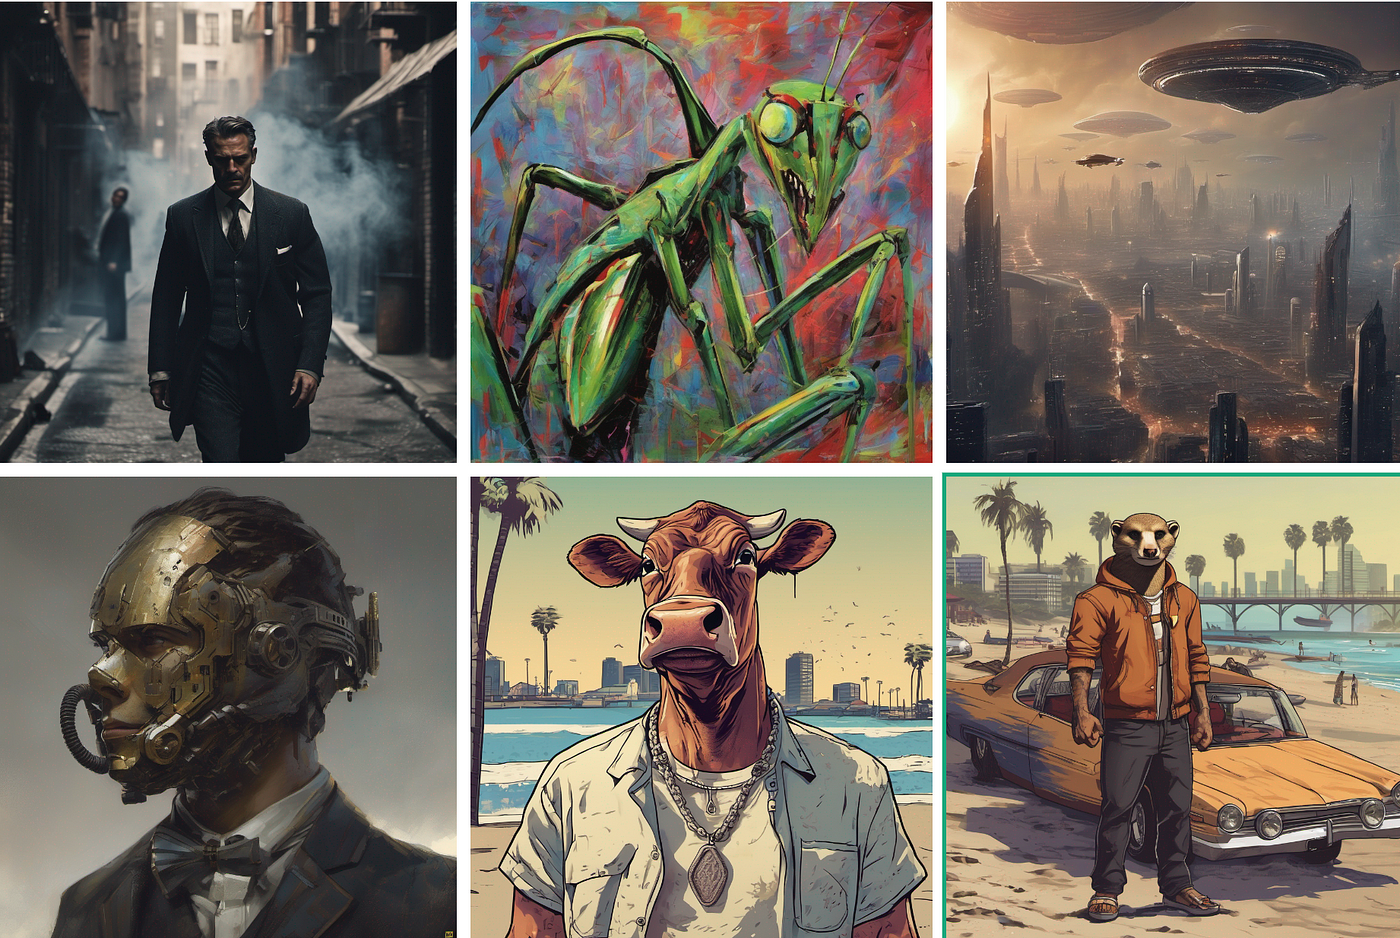


- It is a text-to-image model
- It has three modules
    - Text Encoder
        - Converts a text prompt into latent vector.
    - Diffusion Model
        - Repeatedly denoises the latent patch(64x64).

    ![Diffusion](./undefined%20-%20Imgur.gif)

    - Decoder
        - Converts a latent patch into a higher resolution 512x512 image.


![Alt text](arch.png)

In [1]:
#!pip install tensorflow keras_cv --upgrade

In [1]:
import time
import tensorflow as tf
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

2024-02-03 18:09:31.647762: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-03 18:09:32.900220: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 18:09:32.900293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 18:09:33.101222: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 18:09:33.576822: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-03 18:09:33.578491: I tensorflow/core/platform/cpu_feature_guard.cc:1

Using TensorFlow backend


In [2]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [3]:
%%time
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=1)

2024-02-03 18:09:45.402256: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 18:09:46.838874: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-02-03 18:09:53.264856: I external/local_xla/xla/service/service.cc:168] XLA service 0x55a93bcff220 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-02-03 18:09:53.264901: I external/local_xla/xla/service/service.cc:176]   

50/50 [==============================] - 421s 7s/step


2024-02-03 18:17:05.652440: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  %reduce-window.24 = f32[1,4,4,32,1]{4,3,2,1,0} reduce-window(f32[1,128,128,32,16]{4,3,2,1,0} %broadcast.186, f32[] %constant.483), window={size=1x32x32x1x16 stride=1x32x32x1x16}, to_apply=%decoder_resnet_block_5_group_normalization_72_weighted_moments_sum_of_weights-reduction.485

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2024-02-03 18:17:06.631076: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.978706717s
Constant folding an instruction is taking > 1s:

  %redu

CPU times: user 1h 13min 35s, sys: 1min 43s, total: 1h 15min 19s
Wall time: 8min 57s


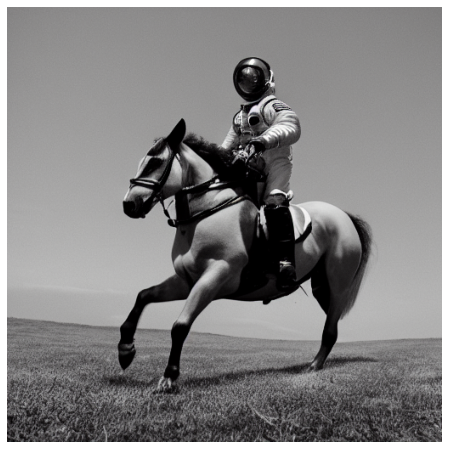

In [5]:
def plot_images(images):
    plt.figure(figsize=(8, 8))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

In [6]:
# images = model.text_to_image(
#     "cute magical flying dog, fantasy art, "
#     "golden color, high quality, highly detailed, elegant, sharp focus, "
#     "concept art, character concepts, digital painting, mystery, adventure",
#     batch_size=1,
# )
# plot_images(images)

### Mixed Precision

"Mixed precision" consists of performing computation using float16 precision, while storing weights in the float32 format. \
This is done to take advantage of the fact that float16 operations are backed by significantly faster kernels than their \
float32 counterparts on modern NVIDIA GPUs.

In [13]:
keras.mixed_precision.set_global_policy("mixed_float16")
model = keras_cv.models.StableDiffusion(jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [14]:
model = keras_cv.models.StableDiffusion()

print("Compute dtype:", model.diffusion_model.compute_dtype)
print(
    "Variable dtype:",
    model.diffusion_model.variable_dtype,
)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
Compute dtype: float16
Variable dtype: float32


50/50 [==============================] - 620s 12s/step


2024-02-03 18:54:52.776623: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 16s:

  %reduce-window.60 = f32[1,16,16,32,1]{4,3,2,1,0} reduce-window(f32[1,512,512,32,8]{4,3,2,1,0} %broadcast.507, f32[] %constant.594), window={size=1x32x32x1x8 stride=1x32x32x1x8}, to_apply=%decoder_2_resnet_block_39_group_normalization_327_weighted_moments_sum_of_weights-reduction.596

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2024-02-03 18:54:52.935214: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 16.158661217s
Constant folding an instruction is taking > 16s:

 

XLA + mixed precision: 748.44 seconds


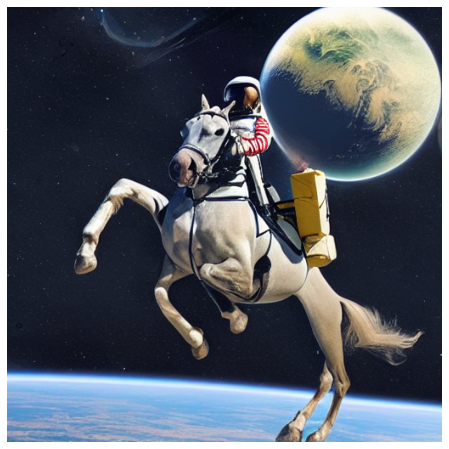

In [15]:
benchmark_result = []
start = time.time()
images = model.text_to_image(
    "photograph of an astronaut riding a horse", 
    batch_size=1,
)
end = time.time()
benchmark_result.append(["XLA + Mixed Precision", end - start])
plot_images(images)

print(f"XLA + mixed precision: {(end - start):.2f} seconds")